In [87]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
import math

In [88]:
# train

class Guess:
    
    def __init__(self, alphabet):
        self.alphabet = alphabet
        self.total_count = 0
        self.char_freq = {}
        for ch in alphabet:
            self.char_freq[ch] = 0
        
    # fit one specific dataset 
    def fit(self, words):
        for word in words:
            for ch in word:
                if ch in self.alphabet:
                    self.char_freq[ch] += 1
                    self.total_count += 1
    # score a password
    def score(self,word):
        # G(x) = sum(pi*i)
        result = 0
        for i in range(len(word)):
            if word[i] in self.alphabet:
                result += math.log(self.total_count/self.char_freq[word[i]])
        return result
        
        
alphabet = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '
model = Guess(alphabet)
words = []
with open('000webhost.txt',encoding='utf8') as f:
    line = 'a'
    while line:
        line = f.readline()[:-1]
        words.append(line)
        
model.fit(words)

In [89]:
df = pd.read_csv('000webhost.txt',header=None)

In [90]:
df['length'] = df[0].apply(len)
df = df[(8<=df['length']) & (df['length']<=30)]
df['score'] = df[0].apply(model.score)

In [193]:
df.shape  # reamining dataset size

(573388, 4)

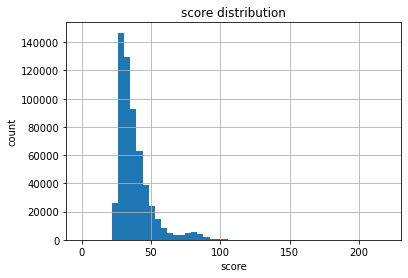

In [96]:
df['score'].hist(bins=50)
plt.title('score distribution')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

In [194]:
df['score'].quantile([0,0.9,0.99]) # using this to classify the safe level of a password

0.00     0.000000
0.90    51.607385
0.99    85.569127
Name: score, dtype: float64

In [98]:
grouped = df.groupby('length')  # group by length, to get the relation of score and length
tmp = grouped.mean()

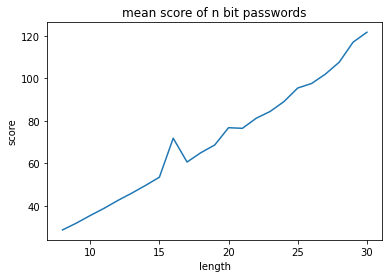

In [99]:
plt.plot(tmp.index, tmp.score)
plt.title('mean score of n bit passwords')
plt.xlabel('length')
plt.ylabel('score')
plt.show()

In [111]:
# function to label the safe level of password strength
def labeled(x):
    if x > 86:
        return 'Strong'
    elif x > 52:
        return 'Median'
    else:
        return 'Weak'
    
df['label'] = df['score'].apply(labeled)

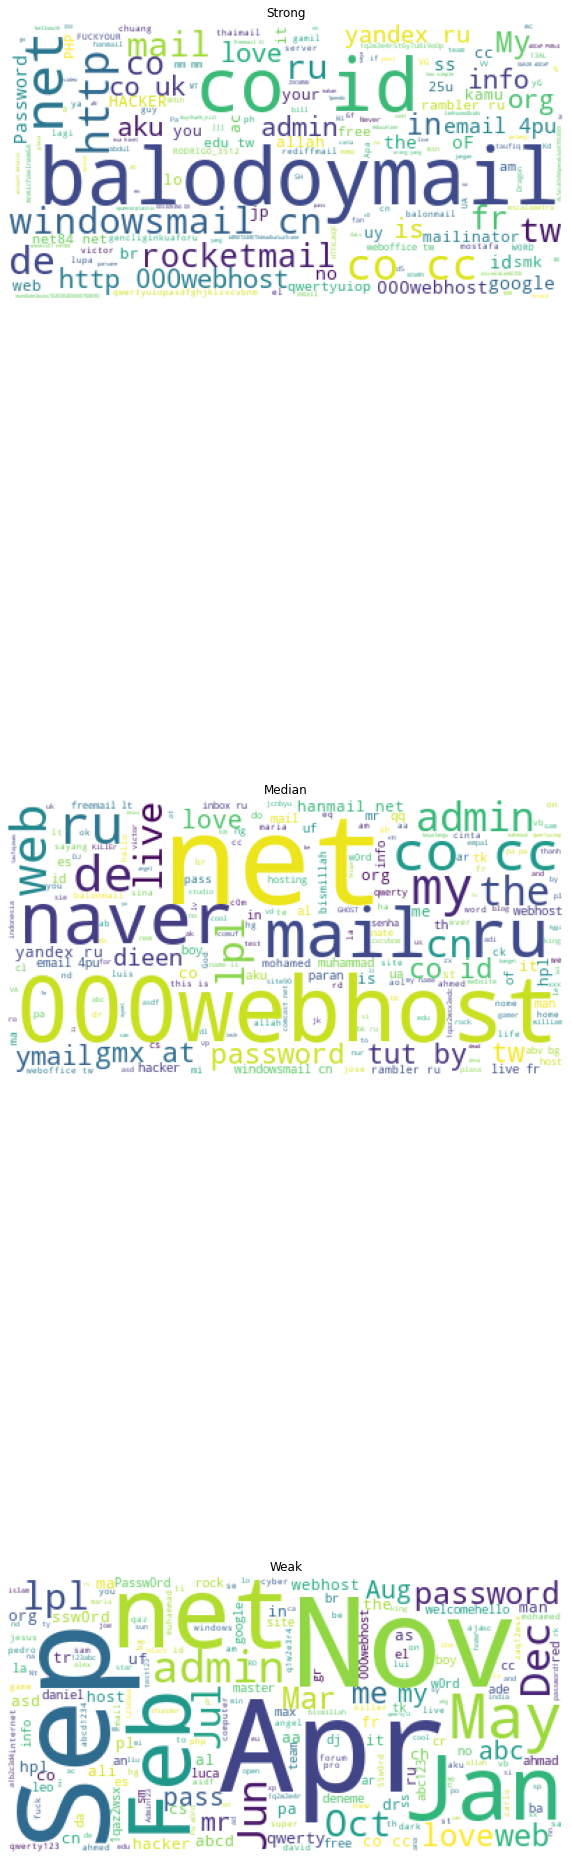

In [113]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(10, 40.5)
labels = ['Strong', 'Median', 'Weak']
for i in range(3):
    word_list = df[df['label']==labels[i]][0].to_list()
    space_list = ' '.join(word_list)
    wc = WordCloud(background_color='white',stopwords=('gmail','yahoo','hotmail','com','www')).generate(space_list)
    ax[i].imshow(wc) 
    ax[i].set_title(labels[i])
    ax[i].axis('off') 
plt.show()

From above word cloud plots, we know that
a safer password with longer password

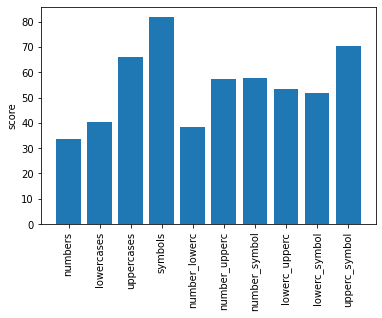

In [138]:
names = ['numbers','lowercases','uppercases','symbols']
lst = ['0123456789', 'abcdefghijklmnopqrstuvwxyz', 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', '!@#$%^&*()']
d = {}

for i in range(4):
    chars = lst[i]
    for k in range(1000):
        p = ''.join(random.sample(chars, 10))  # randomly generate passwords from chars
        if names[i] in d:
            d[names[i]].append(p)
        else:
            d[names[i]] = []
        

for i in range(3):
    for j in range(i+1,4):
        chars = lst[i] + lst[j]
        name = names[i][:6] + '_' + names[j][:6]
        for k in range(1000):
            p = ''.join(random.sample(chars, 10))
            if name in d:
                d[name].append(p)
            else:
                d[name] = []
                
kinds = []
mean_scores = []
for key in d:
    kinds.append(key)
    s = 0
    for p in d[key]:
        s += model.score(p)
    mean_scores.append(s/len(d[key]))
plt.bar(kinds, mean_scores)
plt.xticks(rotation = 90)

plt.ylabel('score')
plt.show()

In [191]:
import random
import sys
def generate_password(p=None,n=14):
    # try to use uppercases and symbols
    chars = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' + '!@#$%^&*()'
    if p:
        result = ''
        for ch in p:
            if ch.isdigit():
                result += '!@#$%^&*()'[int(ch)]
            else:
                result += ch.upper()
        if len(result)<16:
            result += ''.join(random.sample(chars, 14-n))
        return result
    else:
        
        return ''.join(random.sample(chars, n))
    


In [192]:
# testing and verify our method of generate strong passwords
p = generate_password()
s = model.score(p)
print(p,':',labeled(s))

J#LP^X)KUFHTO% : Strong
